# Cifar-10 이미지 분류_v1
- 데이터 부풀림 없는 버전

In [1]:
import tensorflow as tf
import numpy as np
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 전처리

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train[0][0]

6

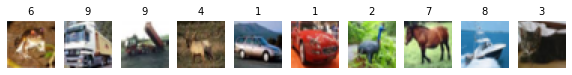

In [7]:
plt.figure(figsize = (10, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(y_train[i,0], fontsize = 10)
plt.show()

- X_data Scaling

In [8]:
X_train = X_train/255.
X_test = X_test/255.

- y_data One-Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## 모델 정의 및 설정

In [19]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = X_train.shape[1:],padding = 'same', activation = 'relu'),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [16]:
model.compile(RMSprop(learning_rate=0.0001, decay = 1e-6), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience = 10)

In [17]:
hist = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 32, callbacks = [mc, es]
)

Epoch 1/100
1241/1250 [============================>.] - ETA: 0s - loss: 1.8298 - accuracy: 0.3271
Epoch 1: val_loss improved from inf to 1.57528, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 19s 6ms/step - loss: 1.8283 - accuracy: 0.3277 - val_loss: 1.5753 - val_accuracy: 0.4248
Epoch 2/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.5204 - accuracy: 0.4430
Epoch 2: val_loss improved from 1.57528 to 1.37997, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5202 - accuracy: 0.4433 - val_loss: 1.3800 - val_accuracy: 0.5058
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 1.3947 - accuracy: 0.4945
Epoch 3: val_loss improved from 1.37997 to 1.27177, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3945 - accuracy: 0.4947 - val_loss: 1.2718 - val_accuracy: 0.5525
Epoch 4/100
1250/1250 [=======================

In [20]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.7827


[0.6512609124183655, 0.7827000021934509]

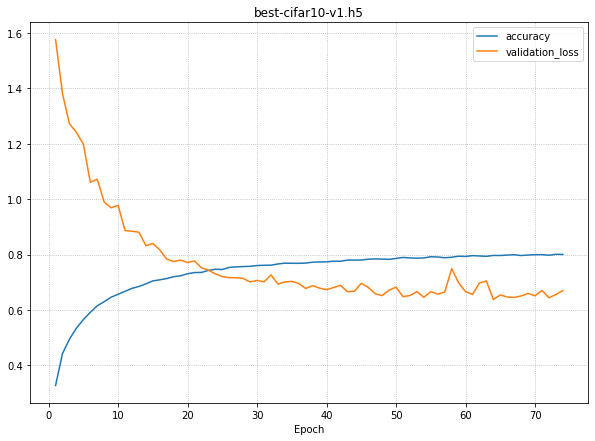

In [21]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize = (10, 7))
plt.plot(xs, y_acc, label = 'accuracy')
plt.plot(xs, y_vloss, label = 'validation_loss')
plt.xlabel('Epoch')
plt.title(model_path)
plt.legend()
plt.grid(linestyle = ':')

plt.show()